# Customer Churn Analysis

In [48]:
# Load Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns

In [49]:
!pip install xgboost
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [50]:
# Load given data and see intial 5 rows
df = pd.read_csv('Customer Churn1.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
# drop column phone number
df = df.drop(['phone number'],axis=1)
df.shape

(3333, 20)

In [52]:
# check for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [53]:
print(" Data Types \n",df.dtypes)
print("---------------------------------------------")
print(" Data type Count \n",df.dtypes.value_counts())
print("---------------------------------------------")

 Data Types 
 state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
---------------------------------------------
 Data type Count 
 float64    8
int64      8
object     3
bool       1
dtype: int64
---------------------------------------------


In [54]:
# Let's do Label Encoding for Catergorical Variable
cate = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool', 'object']]

In [55]:
le = preprocessing.LabelEncoder()
for i in cate:
    le.fit(df[i])
    df[i] = le.transform(df[i])

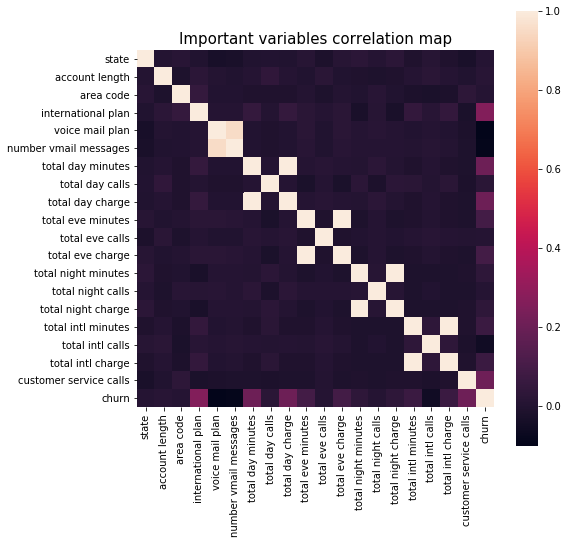

In [56]:
# Let's check Correlation Plot
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

In [57]:
y = df['churn']
df = df = df.drop(['churn'],axis=1)

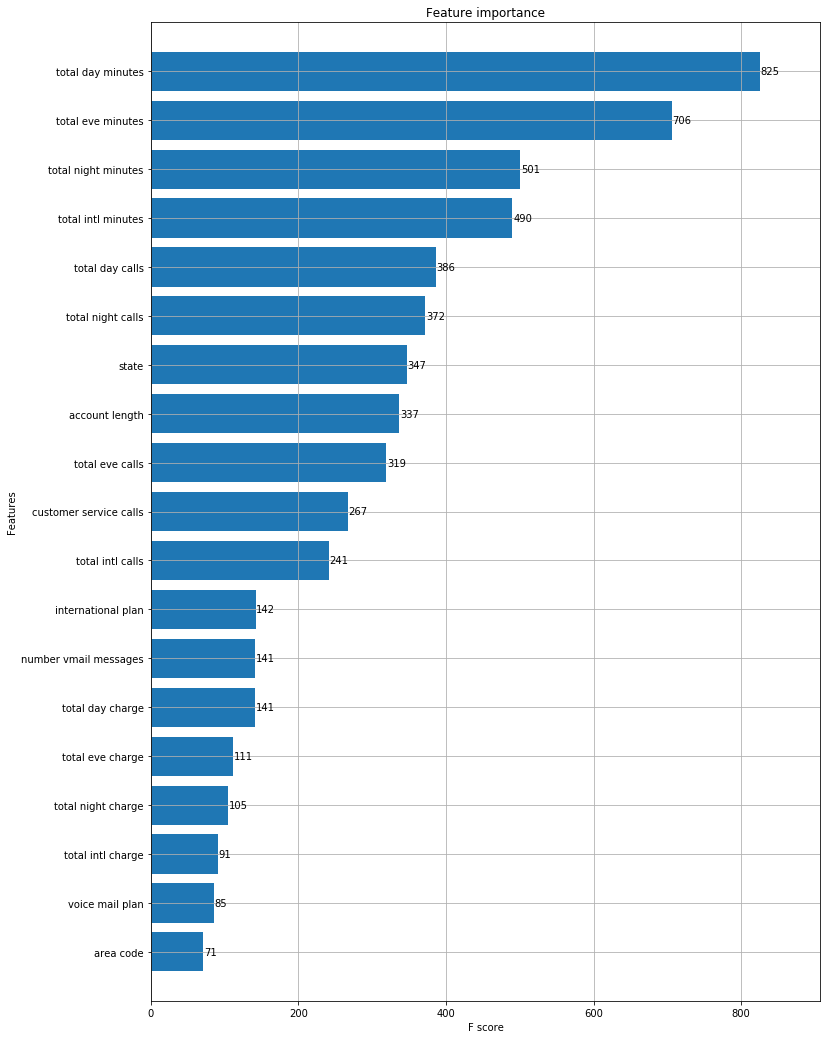

In [58]:
# Let's import Feature by XGB
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(df, y)
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [59]:
# now Let's Split Train and Validate Dataset
xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)


In [60]:
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(2999, 19) (334, 19) (2999,) (334,)


In [61]:
clf = LogisticRegression(C=1.0)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
lr = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8323353293413174
auc 0.5033508158508159


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
algo = pd.DataFrame([lr])

In [63]:
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
xg = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9461077844311377
auc 0.8471736596736598


In [64]:
algo = algo.append([xg])

In [65]:
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
mnb = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.6736526946107785
auc 0.653409090909091


In [66]:
algo = algo.append([mnb])

In [67]:
clf = AdaBoostClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
abc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8592814371257484
auc 0.6404428904428904


In [68]:
algo = algo.append([abc])

In [69]:
clf = KNeighborsClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
knc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8802395209580839
auc 0.6440122377622378


In [70]:
algo = algo.append([knc])

In [71]:
clf = GradientBoostingClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9431137724550899
auc 0.845425407925408


In [72]:
algo = algo.append([gbc])

In [73]:
clf = ExtraTreesClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
etc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9191616766467066
auc 0.7360868298368298


In [74]:
algo = algo.append([etc])

In [75]:
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8712574850299402
auc 0.7601252913752913


In [76]:
algo = algo.append([dtc])

In [77]:
# Let's see the results of all algorithm 
algo.sort_values([1], ascending=[False])

,0,1,2
0,<class 'xgboost.sklearn.XGBClassifier'>,0.946108,0.847174
0,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.943114,0.845425
0,<class 'sklearn.ensemble._forest.ExtraTreesCla...,0.919162,0.736087
0,<class 'sklearn.neighbors._classification.KNei...,0.880240,0.644012
0,<class 'sklearn.tree._classes.DecisionTreeClas...,0.871257,0.760125
0,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.859281,0.640443
0,<class 'sklearn.linear_model._logistic.Logisti...,0.832335,0.503351
0,<class 'sklearn.naive_bayes.MultinomialNB'>,0.673653,0.653409
